# Object Detection

## Russian License Plate Blurring

Using Haar Cascades to blur license plates detected in an image!

Russians are famous for having some of the most entertaining DashCam footage on the internet.

**TASK: Import the usual libraries you think you'll need.**

In [19]:
import cv2
import matplotlib.pyplot as plt

In [20]:
img = cv2.imread('./DATA/russian_car_plate.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [21]:
def display(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

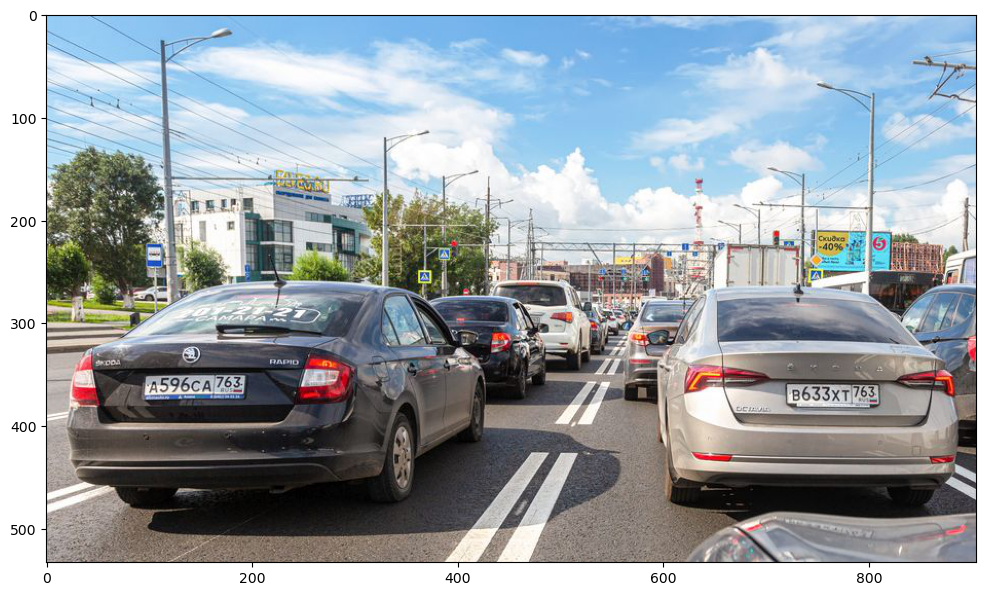

In [22]:
display(img)

In [23]:
classifier = cv2.CascadeClassifier('./DATA/haarcascade_russian_plate_number.xml')

In [24]:
def detect_plate(img):
    img_copy = img.copy()
    coordinates = classifier.detectMultiScale(img, scaleFactor = 1.2)
  
    for x,y,w,h in coordinates:
        cv2.rectangle(img_copy, (x,y), (x+w,y+h), (255,0,0),3)
    
    return img_copy

In [25]:
result = detect_plate(img)

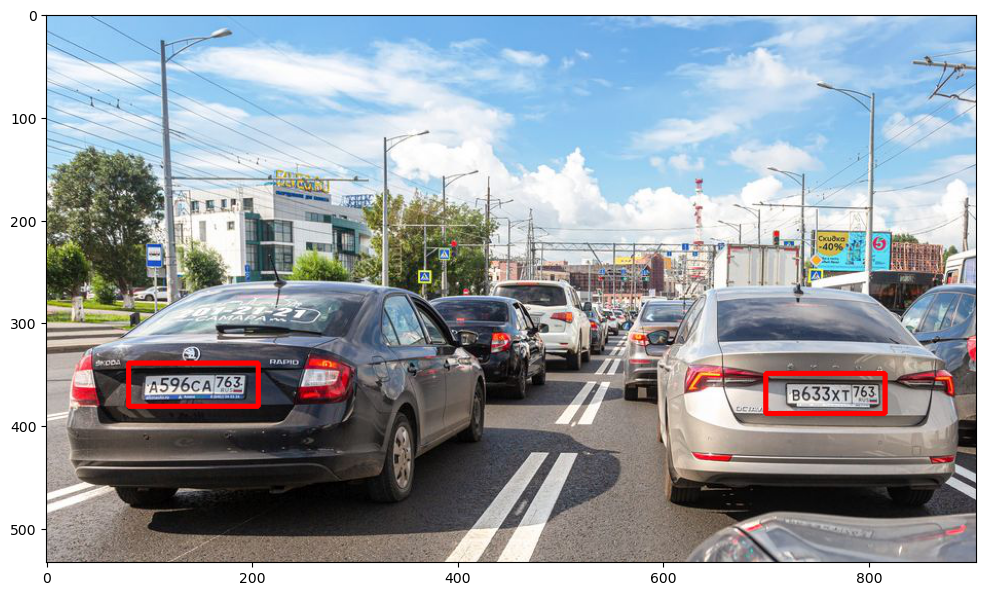

In [26]:
display(result)

In [27]:
def detect_and_blur_plate(img):
    img_copy = img.copy()
    coordinates = classifier.detectMultiScale(img, scaleFactor = 1.2)
  
    for x,y,w,h in coordinates:
        license_plate = img_copy[y:y+h,x:x+w,:]
        license_plate_blurred = cv2.medianBlur(license_plate, ksize = 7)
        img_copy[y:y+h,x:x+w,:] = license_plate_blurred
    
    return img_copy
    

In [28]:
result = detect_and_blur_plate(img)

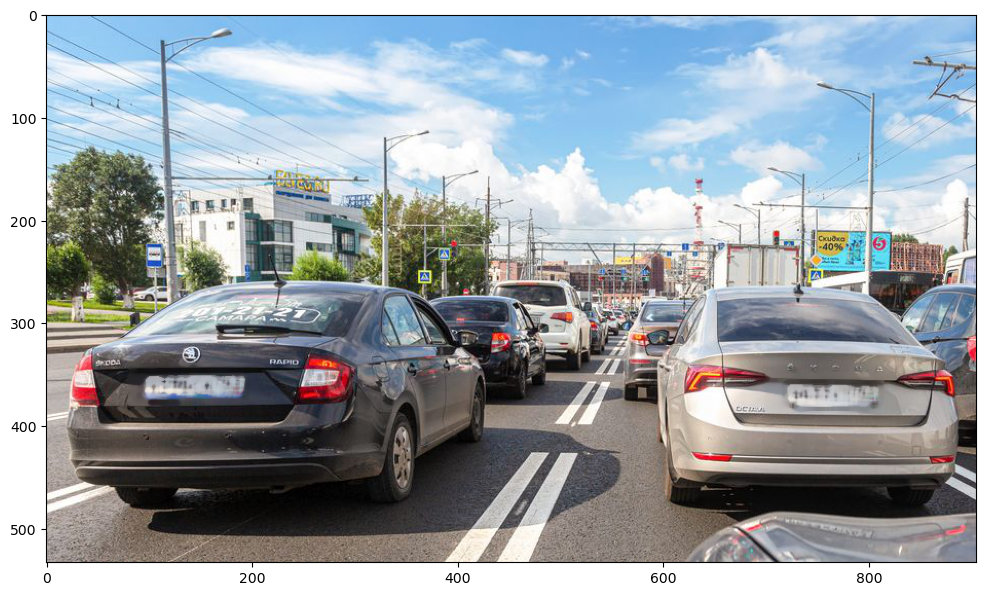

In [29]:
display(result)